In [1]:
import os
import cv2
from os import listdir
from os.path import isfile, join

import random
import numpy as np

from imgaug import augmenters as iaa
import PIL.Image as Image
import matplotlib.pyplot as plt
# %matplotlib notebook 

from IPython.core.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

covid_images_path = os.path.join("images", "COVID-19") 
normal_images_path = os.path.join("images", "Normal")
bacteria_images_path = os.path.join("images", "Bacteria")
virus_images_path = os.path.join("images", "Virus")

covid_images = [os.path.join(covid_images_path, f) for f in listdir(covid_images_path) if isfile(join(covid_images_path, f))]
normal_images = [os.path.join(normal_images_path, f) for f in listdir(normal_images_path) if isfile(join(normal_images_path, f))]
bacteria_images = [os.path.join(bacteria_images_path, f) for f in listdir(bacteria_images_path) if isfile(join(bacteria_images_path, f))]
virus_images = [os.path.join(virus_images_path, f) for f in listdir(virus_images_path) if isfile(join(virus_images_path, f))]

print(f"Total covid_images: {len(covid_images)}")
print(f"Total normal_images: {len(normal_images)}")
print(f"Total bacteria_images: {len(bacteria_images)}")
print(f"Total virus_images: {len(virus_images)}")

Total covid_images: 179
Total normal_images: 179
Total bacteria_images: 179
Total virus_images: 179


# Showing samples of our x-ray dataset

In [2]:
image_size = (100, 100)

def resize_image(img_array):
    img = Image.fromarray(img_array)
    img = img.resize(image_size)
    return np.array(img)

def show_images(images, title=""):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 15), dpi=100)   
    for i, img in enumerate(images):
#         img = (img * 255).astype(np.uint8)
        ax[i].imshow(img)
        ax[i].set_title(title)
    [x.axis('off') for x in ax]
    plt.show()
    
def convert_images(image_paths):
    images = [np.array(Image.open(img).convert('RGB')) for img in image_paths]
    images = [resize_image(img) for img in images]    
    return np.array(images)

## Load and reszie our images

In [3]:
covid_image_arrs = convert_images(covid_images)
normal_image_arrs = convert_images(normal_images)
bacteria_image_arrs = convert_images(bacteria_images)
virus_image_arrs = convert_images(virus_images)

print(f"covid_image_arrs: {covid_image_arrs.shape}")
print(f"normal_image_arrs: {normal_image_arrs.shape}")
print(f"bacteria_image_arrs: {bacteria_image_arrs.shape}")
print(f"virus_image_arrs: {virus_image_arrs.shape}")

covid_image_arrs: (179, 100, 100, 3)
normal_image_arrs: (179, 100, 100, 3)
bacteria_image_arrs: (179, 100, 100, 3)
virus_image_arrs: (179, 100, 100, 3)


## Showing random x-rays

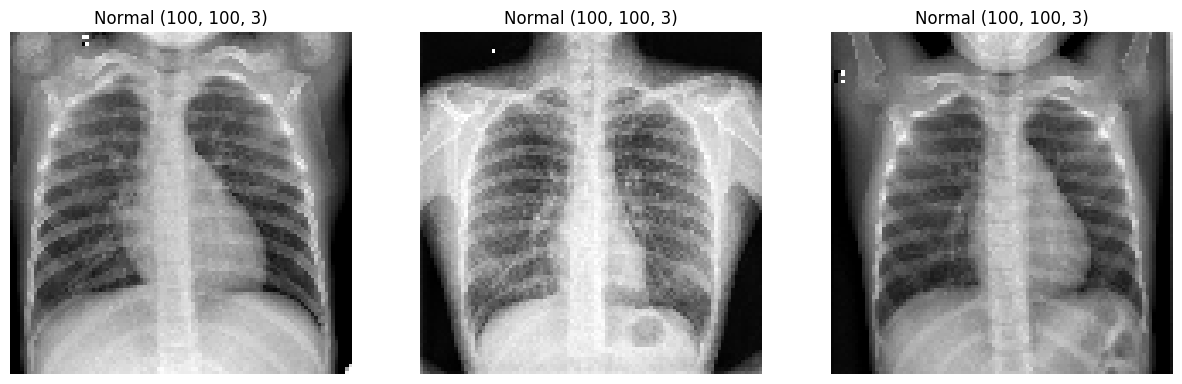

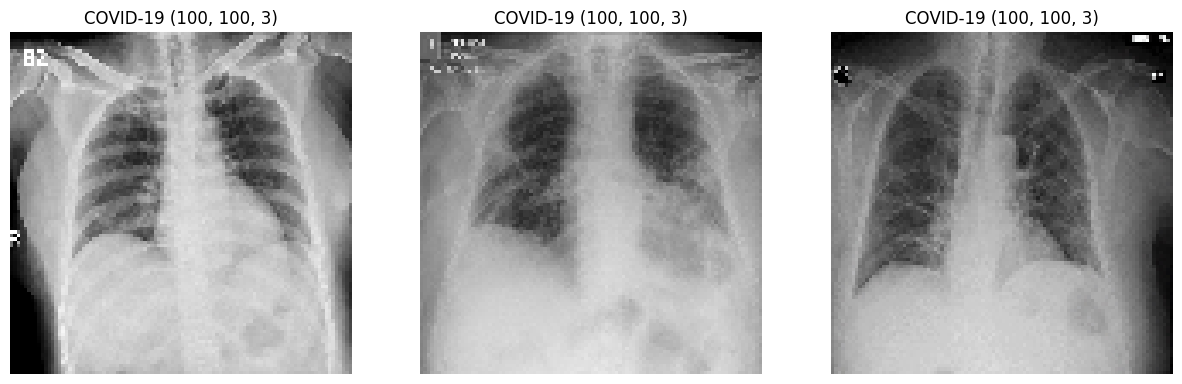

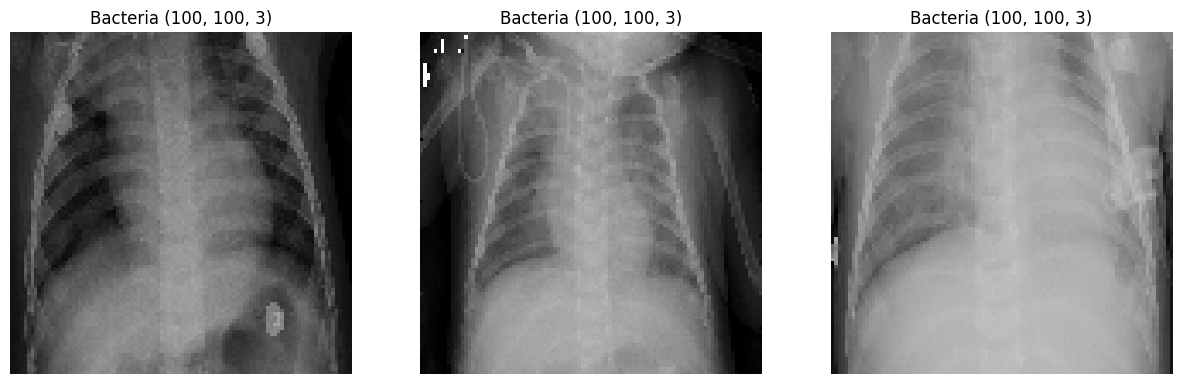

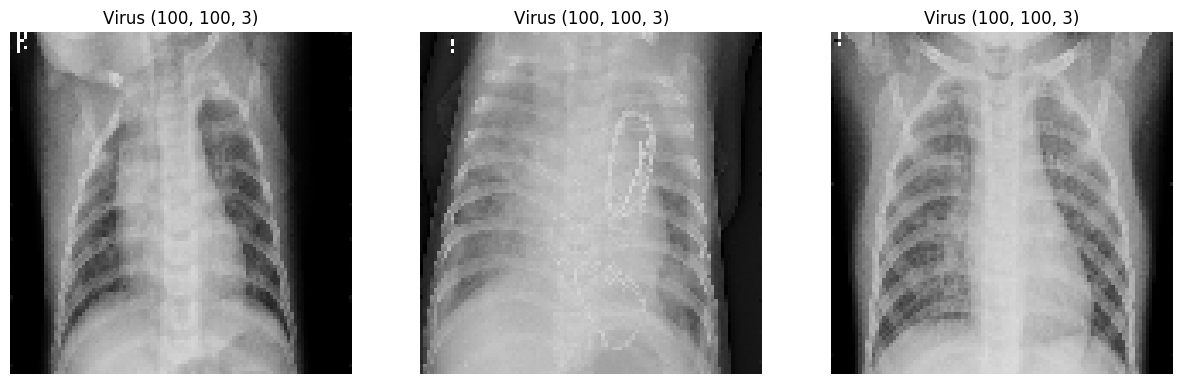

In [4]:
# Show random images that are Normal
show_images(random.sample(list(normal_image_arrs), 3), f"Normal {normal_image_arrs[0].shape}")

# Show random images that has COVID-19 Infection
show_images(random.sample(list(covid_image_arrs), 3), f"COVID-19 {covid_image_arrs[0].shape}")

# Show random images that has Bacteria Infection
show_images(random.sample(list(bacteria_image_arrs), 3), f"Bacteria {bacteria_image_arrs[0].shape}")

# Show random images that are Virus Infection
show_images(random.sample(list(virus_image_arrs), 3), f"Virus {virus_image_arrs[0].shape}")

# Train / Test Split

In [5]:
from sklearn.model_selection import train_test_split
import cv2

# 70:30 split on our dataset
train_size = int(len(covid_image_arrs) * 0.7)
test_size = len(covid_image_arrs) - train_size

# creating labels ["Normal", "COVID-19", "Bacteria"]
# labels = ["Normal", "COVID-19", "Bacteria", "Virus"]
labels = ["Normal", "COVID-19", "Bacteria"]
y1 = [[1., 0., 0.] for i in range(len(normal_image_arrs))]
y2 = [[0., 1., 0.] for i in range(len(covid_image_arrs))]
y3 = [[0., 0., 1.] for i in range(len(bacteria_image_arrs))]
# y4 = [[0., 0., 0., 1.] for i in range(len(virus_image_arrs))]

# splitting our data equally from each class
nX_train, nX_test, ny_train, ny_test = train_test_split(normal_image_arrs, y1, test_size=0.33, random_state=12)
cX_train, cX_test, cy_train, cy_test = train_test_split(covid_image_arrs, y2, test_size=0.33, random_state=12)
bX_train, bX_test, by_train, by_test = train_test_split(bacteria_image_arrs, y3, test_size=0.33, random_state=12)
# vX_train, vX_test, vy_train, vy_test = train_test_split(virus_image_arrs, y4, test_size=0.33, random_state=12)

# combining both of the classes 
# 4 Classes
# X_train = np.concatenate((cX_train, nX_train, bX_train, vX_train), axis=0)
# X_test = np.concatenate((cX_test, nX_test, bX_test, vX_test), axis=0)
# y_train = np.concatenate((cy_train, ny_train, by_train, vy_train), axis=0)
# y_test = np.concatenate((cy_test, ny_test, by_test, vy_test), axis=0)
# 3 Classes
X_train = np.concatenate((cX_train, nX_train, bX_train), axis=0)
X_test = np.concatenate((cX_test, nX_test, bX_test), axis=0)
y_train = np.concatenate((cy_train, ny_train, by_train), axis=0)
y_test = np.concatenate((cy_test, ny_test, by_test), axis=0)

# preparing our test data
shuffle_list = list(range(len(X_test)))
random.shuffle(shuffle_list)

shufX_test = []
shufy_test = []

for i in shuffle_list:
    shufX_test.append(X_test[i])
    shufy_test.append(y_test[i])

X_test = np.array(shufX_test)
y_test = np.array(shufy_test)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (357, 100, 100, 3), y_train: (357, 3)
X_test: (180, 100, 100, 3), y_test: (180, 3)


## How our labels will look like
[Normal, COVID-19, Bacteria, Virus]

[1, 0, 0, 0] => Negative classify, healthy image

[0, 1, 0, 0] => Positive classify for COVID-19

[0, 0, 1, 0] => Positive classify for Bacteria

[0, 0, 0, 1] => Positive classify for Virus

In [8]:
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Creating our Data Generator

Data generator uses following techniques to augment images.
- <b>Histogram equalization</b>
    - This normalise the contrast of the image makes image more clear in darker areas
- <b>Image augmentation</b>
    - Image augmentation create more training samples for our model as our data set is very small

In [6]:
class data_generator:
    def create_train(self, train_set, test_set, batch_size, is_augmented=False):
        shape = train_set.shape[1:]
        while True:
            random_indexes = np.random.choice(len(train_set), batch_size)
            batch_images = []
            batch_labels = []
            for idx in random_indexes:
                # getting image
                image = train_set[idx]
                # augment image
                image = self.augment(image)
                # image historgram equalization
                image = self.histogram_equalization(image)
                # image denoise 
                # image = cv2.medianBlur(image, 3)
                # image normalization
                image = np.divide(image, 255)                
                batch_images.append(image)
                
                # getting label
                label = test_set[idx] 
                batch_labels.append(label)
            yield np.array(batch_images), np.array(batch_labels)
            
    def histogram_equalization(self, image):
        r,g,b = cv2.split(image)
        r = cv2.equalizeHist(r)
        g = cv2.equalizeHist(g)
        b = cv2.equalizeHist(b)
        return np.stack((r,g,b), -1)
    
    def augment(self, image):  
        """
        Randomly process images to create more samples
        """
        sometimes = lambda aug: iaa.Sometimes(0.5, aug) # randomly apply 50% of the time
        augment_seq = iaa.Sequential([
            iaa.OneOf([
                iaa.Affine(rotate=0),
                iaa.Affine(rotate=90),
                iaa.Affine(rotate=180),
                iaa.Affine(rotate=270),
                iaa.Fliplr(0.5),
                iaa.Flipud(0.5),
            ]),
            sometimes(
            iaa.SomeOf((0,2),
            [
                iaa.GammaContrast((0.5, 2.0)),   
                iaa.PerspectiveTransform(scale=(0.01, 0.15)),
                iaa.Affine(scale=(0.8, 1.2)),
                iaa.CoarseDropout(0.03, size_percent=0.05)
            ], random_order=True))
        ], random_order=True)
        
        image_aug = augment_seq.augment_image(image)
        return image_aug

## Visualise our generated images

[0. 0. 1.] Bacteria
[1. 0. 0.] Normal
[0. 1. 0.] COVID-19
[0. 1. 0.] COVID-19


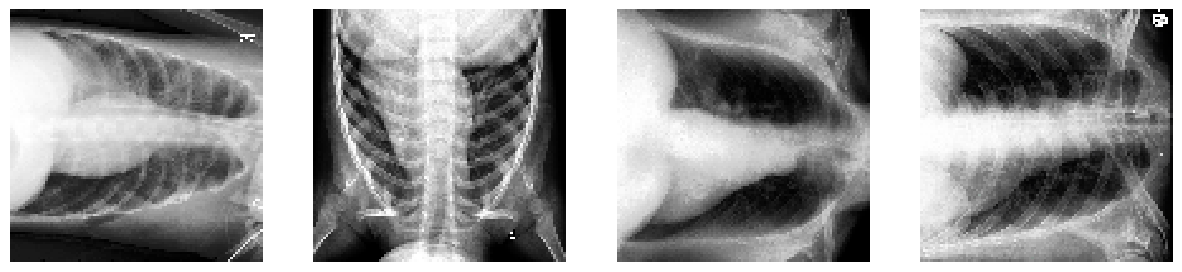

In [7]:
# testing our data generator
batch_size = 45
generator = data_generator()
train_gen = generator.create_train(X_train, y_train, batch_size)
batch_img, batch_label = next(train_gen)

# visualise generate images
for l in batch_label[:4]:
    print(l, labels[np.argmax(l)])
    
show_images(batch_img[:4])

# Creating the usual model 

In [14]:
import tensorflow as tf

from keras import backend as K
from keras.backend.tensorflow_backend import set_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, LambdaCallback
from keras.layers import Input, Dropout, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Conv2D
from keras.layers import Flatten, Dense, MaxPooling2D, ReLU, Concatenate
from keras.models import Model, load_model
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.applications import ResNet50V2, ResNet50, MobileNetV2, VGG16, DenseNet121
from keras.applications.vgg16 import preprocess_input
from keras.layers import LeakyReLU
from keras.activations import linear, softmax, sigmoid
from vis.utils import utils
from vis.visualization import visualize_cam

import warnings
warnings.filterwarnings('ignore')

# Building VGG16 model

In [510]:
# VGG16 transfer learning
def create_model(input_shape, n_out):
    model = Sequential()    
    model.name = "VGG16_Model"
    pretrain_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=input_shape))    
    for layer in pretrain_model.layers: # Set all layers to be trainable
        layer.trainable = True
    for layer in pretrain_model.layers[-4:]: # last 4 layer freeze
        layer.trainable = False

    x = pretrain_model.output
    x = AveragePooling2D(pool_size=(3,3))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(n_out, activation="softmax")(x)

    model = Model(pretrain_model.input, x)    
    return model

In [511]:
batch_size = 50
data_gen = data_generator()
train_gen = data_gen.create_train(X_train, y_train, batch_size)
test_gen = data_gen.create_train(X_test, y_test, batch_size)

opt = Adam(learning_rate=1e-4)
model_path = os.path.join("weights", "vgg16_covid19_weights.hd5")
checkPoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)
reduceLROnPlato = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')
earlyStop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

model = create_model(X_train.shape[1:], n_out=3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(f"Input shape: {X_train.shape[1:]}")
model.summary()

Input shape: (100, 100, 3)
Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (N

In [493]:
history = model.fit_generator(train_gen,
                             steps_per_epoch=len(X_train) // batch_size,
                             validation_data=next(test_gen),
                             validation_steps=len(y_test) // batch_size,
                             epochs=300,
                             verbose=1,
                             callbacks=[reduceLROnPlato, checkPoint, earlyStop])

Epoch 1/300
7/7 [==============================] - 2s 325ms/step - loss: 1.1880 - accuracy: 0.4114 - val_loss: 0.8222 - val_accuracy: 0.6800

Epoch 00001: val_loss improved from inf to 0.82223, saving model to weights/vgg16_covid19_weights.hd5
Epoch 2/300
7/7 [==============================] - 1s 178ms/step - loss: 0.8276 - accuracy: 0.5886 - val_loss: 0.6604 - val_accuracy: 0.6800

Epoch 00002: val_loss improved from 0.82223 to 0.66037, saving model to weights/vgg16_covid19_weights.hd5
Epoch 3/300
7/7 [==============================] - 1s 173ms/step - loss: 0.6976 - accuracy: 0.7057 - val_loss: 0.8377 - val_accuracy: 0.5200

Epoch 00003: val_loss did not improve from 0.66037
Epoch 4/300
7/7 [==============================] - 1s 179ms/step - loss: 0.6935 - accuracy: 0.6800 - val_loss: 0.3760 - val_accuracy: 0.8800

Epoch 00004: val_loss improved from 0.66037 to 0.37604, saving model to weights/vgg16_covid19_weights.hd5
Epoch 5/300
7/7 [==============================] - 1s 183ms/step - 

7/7 [==============================] - 1s 173ms/step - loss: 0.1095 - accuracy: 0.9657 - val_loss: 0.0557 - val_accuracy: 0.9800

Epoch 00039: val_loss did not improve from 0.01797
Epoch 40/300
7/7 [==============================] - 1s 174ms/step - loss: 0.1151 - accuracy: 0.9571 - val_loss: 0.0281 - val_accuracy: 1.0000

Epoch 00040: val_loss did not improve from 0.01797
Epoch 41/300
7/7 [==============================] - 1s 181ms/step - loss: 0.0862 - accuracy: 0.9686 - val_loss: 0.0322 - val_accuracy: 1.0000

Epoch 00041: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.

Epoch 00041: val_loss did not improve from 0.01797
Epoch 42/300
7/7 [==============================] - 1s 172ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0194 - val_accuracy: 1.0000

Epoch 00042: val_loss did not improve from 0.01797
Epoch 43/300
7/7 [==============================] - 1s 181ms/step - loss: 0.0973 - accuracy: 0.9600 - val_loss: 0.0241 - val_accuracy: 1.0000

Epoch 00043: 

In [202]:
# Draw learning curve
def show_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train accuracy")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
    ax[0].legend()
    ax[1].legend()

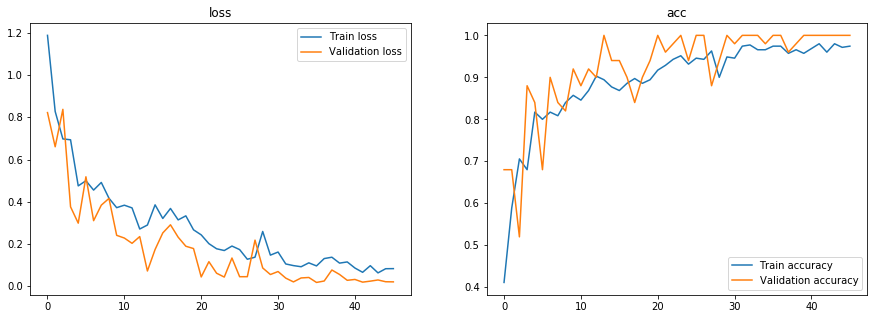

In [494]:
show_history(history)

## Evaluate VGG16 model

In [108]:
from keras.models import load_model
model = load_model('weights/vgg16_covid19_weights.hd5')

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

predict_idxs = model.predict(X_test, batch_size=batch_size)
predict_idxs = np.argmax(predict_idxs, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), predict_idxs)
print(cm)

[[57  1  2]
 [ 0 59  1]
 [ 2  0 58]]


In [112]:
print(classification_report(np.argmax(shufy_test, axis=1), predict_idxs, target_names=labels))

              precision    recall  f1-score   support

      Normal       0.97      0.95      0.96        60
    COVID-19       0.98      0.98      0.98        60
    Bacteria       0.95      0.97      0.96        60

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



# Build Unusually simple model

In [152]:
def create_simple_model(input_shape, n_out):
    """
    Attempt to build a better model, not sure why NOT adding pretrain model works better
    """    
    input_tensor = Input(shape=input_shape)    
    x = AveragePooling2D(pool_size=(3, 3))(input_tensor)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(n_out, activation='softmax')(x)
    
    model = Model(input_tensor, x)
    return model

In [153]:
batch_size = 40
data_gen = data_generator()
train_gen = data_gen.create_train(X_train, y_train, batch_size)
test_gen = data_gen.create_train(X_test, y_test, batch_size)

opt = Adam(learning_rate=1e-4)
model_path = os.path.join("weights", "simple_covid19_weights.hd5")
checkPoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)
reduceLROnPlato = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='min')
earlyStop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

model = create_simple_model(X_train.shape[1:], n_out=3)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(f"Input shape: {X_train.shape[1:]}")
model.summary()

Input shape: (100, 100, 3)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 33, 33, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3267)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                209152    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 209,347
Trainable params: 209,347
Non-trainable params: 0
__________________________

In [171]:
history = model.fit_generator(train_gen,
                             steps_per_epoch=len(X_train) // batch_size,
                             validation_data=next(test_gen),
                             validation_steps=len(y_test) // batch_size,
                             epochs=300,
                             verbose=1,
                             callbacks=[reduceLROnPlato, checkPoint, earlyStop])

Epoch 1/300
8/8 [==============================] - 4s 476ms/step - loss: 1.2165 - accuracy: 0.3562 - val_loss: 0.9571 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.95710, saving model to weights/simple_covid19_weights.hd5
Epoch 2/300
8/8 [==============================] - 0s 13ms/step - loss: 0.9750 - accuracy: 0.4969 - val_loss: 0.9553 - val_accuracy: 0.6000

Epoch 00002: val_loss improved from 0.95710 to 0.95531, saving model to weights/simple_covid19_weights.hd5
Epoch 3/300
8/8 [==============================] - 0s 33ms/step - loss: 0.9361 - accuracy: 0.5875 - val_loss: 0.8438 - val_accuracy: 0.7250

Epoch 00003: val_loss improved from 0.95531 to 0.84385, saving model to weights/simple_covid19_weights.hd5
Epoch 4/300
8/8 [==============================] - 0s 55ms/step - loss: 0.8548 - accuracy: 0.5875 - val_loss: 0.7818 - val_accuracy: 0.7750

Epoch 00004: val_loss improved from 0.84385 to 0.78182, saving model to weights/simple_covid19_weights.hd5
Epoch 5/300

8/8 [==============================] - 0s 53ms/step - loss: 0.5184 - accuracy: 0.7844 - val_loss: 0.4812 - val_accuracy: 0.8250

Epoch 00038: val_loss did not improve from 0.46067
Epoch 39/300
8/8 [==============================] - 0s 53ms/step - loss: 0.5332 - accuracy: 0.7812 - val_loss: 0.4668 - val_accuracy: 0.8250

Epoch 00039: val_loss did not improve from 0.46067
Epoch 40/300
8/8 [==============================] - 0s 53ms/step - loss: 0.5289 - accuracy: 0.7937 - val_loss: 0.4838 - val_accuracy: 0.8000

Epoch 00040: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.

Epoch 00040: val_loss did not improve from 0.46067
Epoch 41/300
8/8 [==============================] - 0s 13ms/step - loss: 0.4582 - accuracy: 0.8406 - val_loss: 0.4752 - val_accuracy: 0.8000

Epoch 00041: val_loss did not improve from 0.46067
Epoch 42/300
8/8 [==============================] - 0s 36ms/step - loss: 0.4958 - accuracy: 0.7937 - val_loss: 0.4645 - val_accuracy: 0.8000

Epoch 00042: val_l

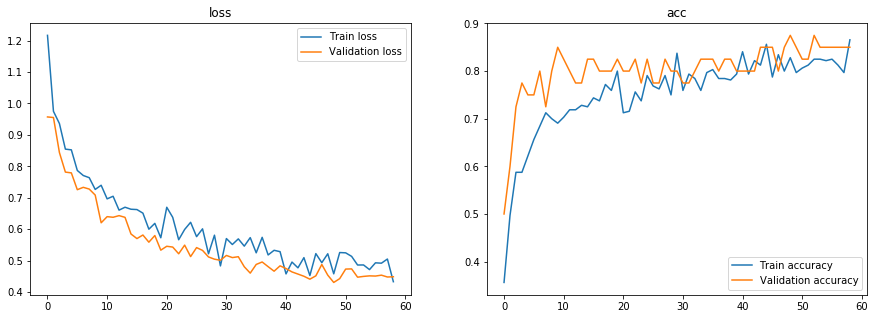

In [172]:
show_history(history)

## Evaluate unusually simple model

In [144]:
from keras.models import load_model
model = load_model('weights/simple_covid19_weights.hd5')

In [314]:
from sklearn.metrics import confusion_matrix, classification_report

predict_idxs = model.predict(X_test, batch_size=batch_size)
predict_idxs = np.argmax(predict_idxs, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), predict_idxs)
print(cm)

[[59  1  0]
 [ 2 56  2]
 [ 3  0 57]]


In [174]:
print(classification_report(np.argmax(shufy_test, axis=1), predict_idxs, target_names=labels))

              precision    recall  f1-score   support

      Normal       0.95      0.87      0.90        60
    COVID-19       0.90      0.92      0.91        60
    Bacteria       0.91      0.97      0.94        60

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180



# Grad-CAM class activation using Keras-Vis

In [120]:
# IMPORTANT - Swap softmax with linear
layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
model.layers[layer_idx].activation = linear
model = utils.apply_modifications(model)

def kera_grad_cam(idx, image, model, show_heatmap=False):
    # convert image to expected format
    image = np.expand_dims(image, axis=0)
    # Make prediction on image
    preds = model.predict(image)
    pred_label = labels[np.argmax(preds)]
    act_label = labels[np.argmax(y_test[idx])]
    
    # Extract predicted class ids, to tell which slice to use on final layer
    class_idxs_sorted = np.argsort(preds.flatten())[::-1]
    class_idx = class_idxs_sorted[0]

    # Getting the last predicted layer
    layer_idx = utils.find_layer_idx(model, model.layers[-1].name)
    # Getting the final conv layer
    penultimate_layer_idx = utils.find_layer_idx(model, "block5_pool") 
    # Getting the heat map using kera-vis
    heatmap  = visualize_cam(model, layer_idx, class_idx, image, 
                               penultimate_layer_idx = penultimate_layer_idx,#None,
                               backprop_modifier     = None,
                               grad_modifier         = None)
    if show_heatmap:        
        plt.imshow(heatmap)        
    return heatmap, pred_label, act_label

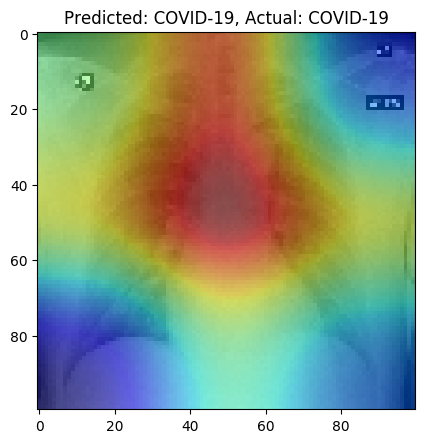

In [145]:
# Get image to show Grad-CAM
idx = 18
image = X_test[idx]

# show heatmap on image
heatmap, pred_label, act_label = kera_grad_cam(idx, image, model, show_heatmap=False)
plt.subplots(figsize=(5, 5), dpi=100)
plt.title(f"Predicted: {pred_label}, Actual: {act_label}")
plt.imshow(image)
plt.imshow(heatmap, alpha=0.5)
plt.show()

## Grad-CAM multiple examples

In [123]:
def show_grad_cam(random_idxs, images):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 15), dpi=100)   
    for i, img in enumerate(images):
        heatmap, pred_label, act_label = kera_grad_cam(random_idxs[i], img, model, show_heatmap=False)
        ax[i].imshow(img)
        ax[i].imshow(heatmap, alpha=0.5)
        ax[i].set_title(f"Predicted: {pred_label},   Actual: {act_label}")
    [x.axis('off') for x in ax]
    plt.show()

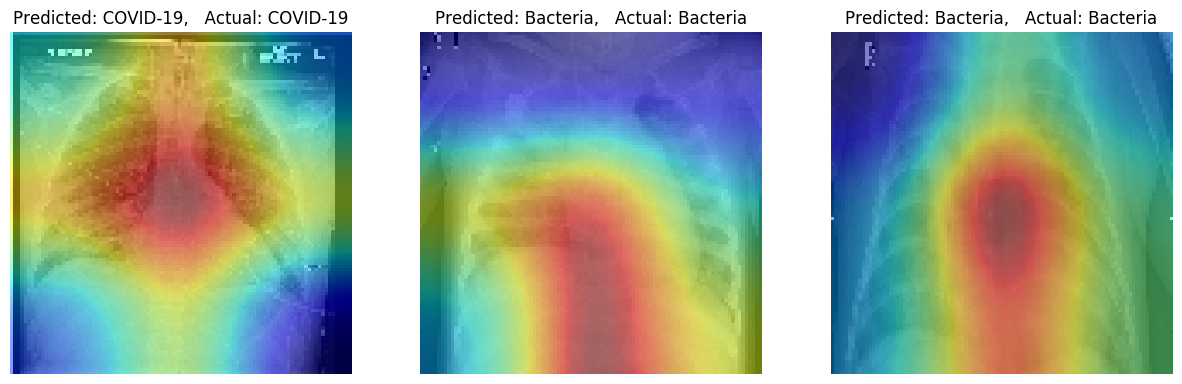

In [148]:
import random
random_idxs = [random.randint(0, X_test.shape[0]) for i in range(3)]
images = X_test[random_idxs]
show_grad_cam(random_idxs, images)

# Export to HTML

In [154]:
!jupyter nbconvert ClassifierV2.ipynb --to html

[NbConvertApp] Converting notebook ClassifierV2.ipynb to html
[NbConvertApp] Writing 1186659 bytes to ClassifierV2.html
